In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import plotly.io as pio
import plotly.express as px 
import scipy.stats as stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Técnicas não supervisionadas

- Cluster [x]

- Analise Fatorial por Componentes Principais

- Analise de Correspondencia

In [2]:
DIR_DATA = './data'

### Clusterização

O Objetivo é agrupar as observações em grupos homogêneos internamente e heterogêneos entre si

* _Dentro do Grupo_: Observações semelhantes com base nas variaveis utilizadas na análise

* _Entre os grupos distintos_: Observações distintas entre os grupos


É uma técnica exploratória (não supervisionada).

* A análise de agrupamentos caracteriza-se por ser uma técnica exploratória, de modo que não tem caráter para observações de fora da amostra

* Se novas observações forem adicionadas à amostra, novos agrupamentos devem ser realizados, pois a inclusão de novas observações pode alterar a composição dos grupos

* Se forem alteradas variaveis da análise, novos agrupamentos devem ser realizados, pois a inclusão/retirada de variaveis podem alterar os grupos.


#### Métodos

* Cluster Heirárquicos Aglomerativo: A quantidade de cluters é definida ao longo da análise (passo-a-passo)

* Cluster Não Heirarquicos K-means: Define-se a priori quantos clusters seram formados

OBS: Necessário padronizar os dados a fim de manter-se nume mesma escala (`zscore` = Media 0, Desvio Padrão 1)

## Analise do dataset de Avaliações

In [3]:
df_vestibular = pd.read_excel(f'{DIR_DATA}/vestibular.xlsx')
df_vestibular.head()

,estudante,matemática,física,química
0,Gabriela,3.7,2.7,9.1
1,Luiz Felipe,7.8,8.0,1.5
2,Patrícia,8.9,1.0,2.7
3,Ovídio,7.0,1.0,9.0
4,Leonor,3.4,2.0,5.0


In [4]:
df_vestibular.describe()

,matemática,física,química
count,5.000000,5.000000,5.000000
mean,6.160000,2.940000,5.460000
std,2.478508,2.918561,3.510413
min,3.400000,1.000000,1.500000
25%,3.700000,1.000000,2.700000
50%,7.000000,2.000000,5.000000
75%,7.800000,2.700000,9.000000
max,8.900000,8.000000,9.100000


In [5]:
fig = px.scatter_3d(df_vestibular, 
                    x='matemática', 
                    y='química', 
                    z='física',
                    text=df_vestibular.estudante)
fig.show()


In [7]:
# Padronização por meio do Z-Score

# Muitas vezes, é importante realizar o procedimento Z-Score nas variáveis
# Quando as variáveis estiverem em unidades de medidas ou escalas distintas
# Poderia ser feito da seguinte forma, embora aqui não utilizaremos!

# Aplicando o procedimento de ZScore
df_vestibular_pad = df_vestibular.drop(columns=['estudante']).apply(zscore, ddof=1)

# Visualizando o resultado do procedimento na média e desvio padrão
print(round(df_vestibular_pad.mean(), 2))
print(round(df_vestibular_pad.std(), 2))

matemática    0.0
física        0.0
química       0.0
dtype: float64
matemática    1.0
física        1.0
química       1.0
dtype: float64


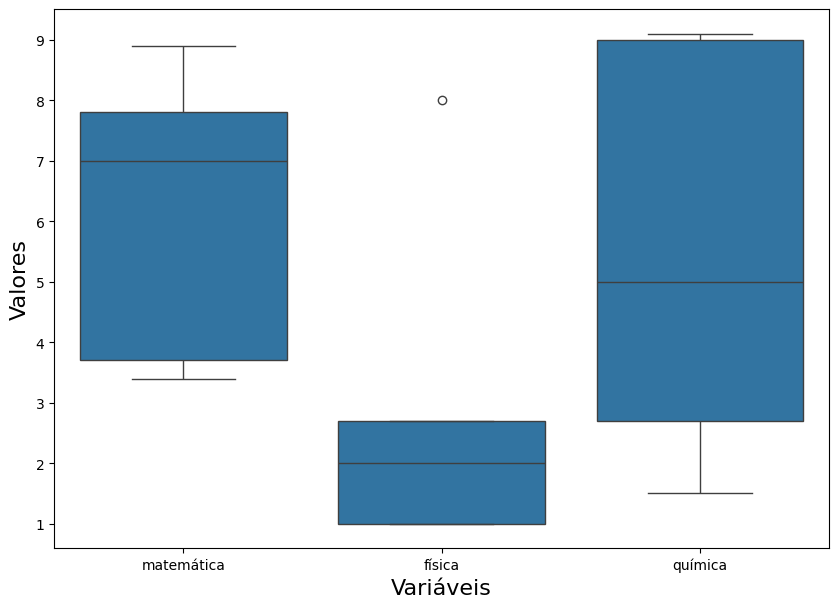

In [8]:
# Boxplot com as três variáveis originais

plt.figure(figsize=(10,7))
sns.boxplot(x='variable', y='value', data=pd.melt(df_vestibular.drop(columns=['estudante'])))
plt.ylabel('Valores', fontsize=16)
plt.xlabel('Variáveis', fontsize=16)
plt.show()

[10.13212712  8.41961994  3.71348893  4.17013189  7.18679344 10.29028668
  8.22253002  6.58027355  6.0448325   5.47357287]


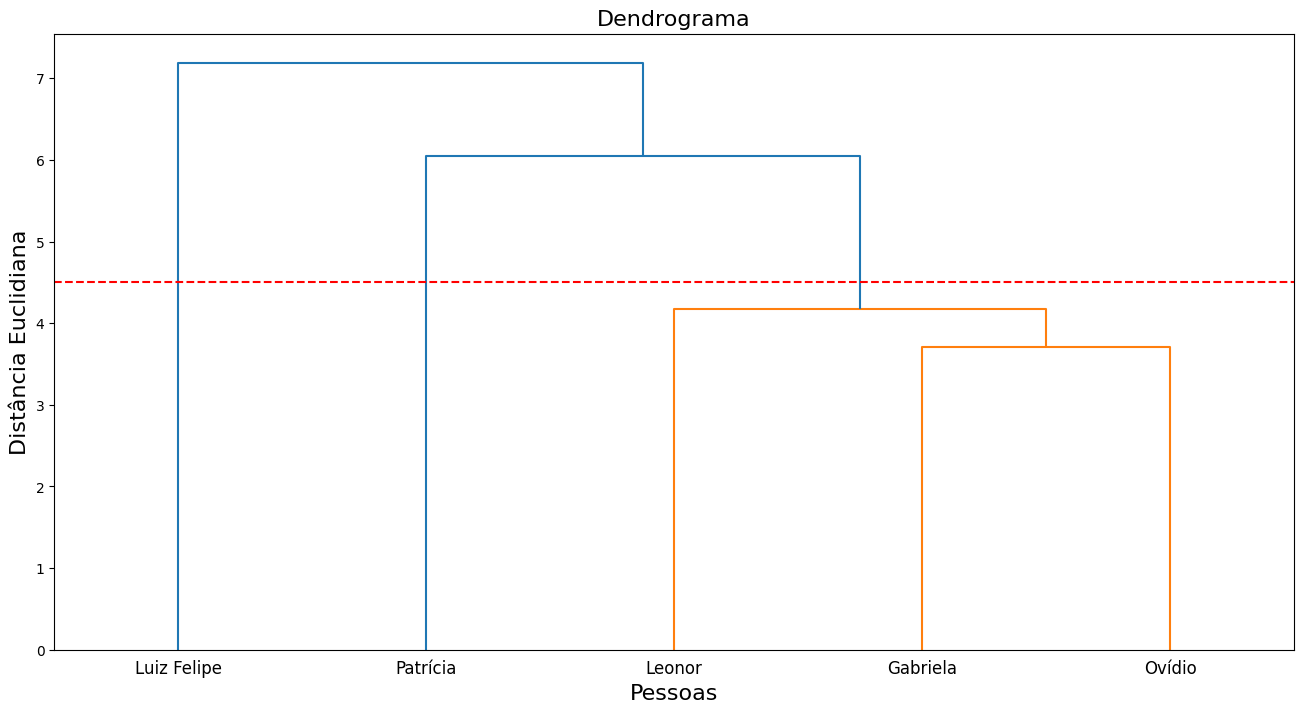

In [10]:
#%% Cluster hierárquico aglomerativo: distância euclidiana + single linkage

# Visualizando as distâncias
dist_euclidiana = pdist(df_vestibular.drop(columns=['estudante']), metric='euclidean')
print(dist_euclidiana)
# Opções para as distâncias ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation

# Gerando o dendrograma
## Distância euclidiana e método de encadeamento single linkage

# Opções para o método de encadeamento ("method"):
    ## single
    ## complete
    ## average

# Opções para as distâncias ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation

plt.figure(figsize=(16,8))
dend_sing = sch.linkage(df_vestibular.drop(columns=['estudante']), method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 4.5, labels = list(df_vestibular.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

In [11]:
# Gerando a variável com a indicação do cluster no dataset

## Deve ser realizada a seguinte parametrização:
    ## Número de clusters (n_clusters)
    ## Medida de distância (metric)
    ## Método de encadeamento (linkage)
    
# Como já observamos 3 clusters no dendrograma, vamos selecionar "3" clusters
# A medida de distância e o método de encadeamento são mantidos

cluster_sing = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'single')
indica_cluster_sing = cluster_sing.fit_predict(df_vestibular.drop(columns=['estudante']))
df_vestibular['cluster_single'] = indica_cluster_sing
df_vestibular['cluster_single'] = df_vestibular['cluster_single'].astype('category')

# Coeficientes do esquema hierárquico de aglomeração (single)
coef_single = [y[1] for y in dendrogram_s['dcoord']]
print(coef_single)

[3.713488925525428, 4.170131892398609, 6.044832503882965, 7.1867934435323795]


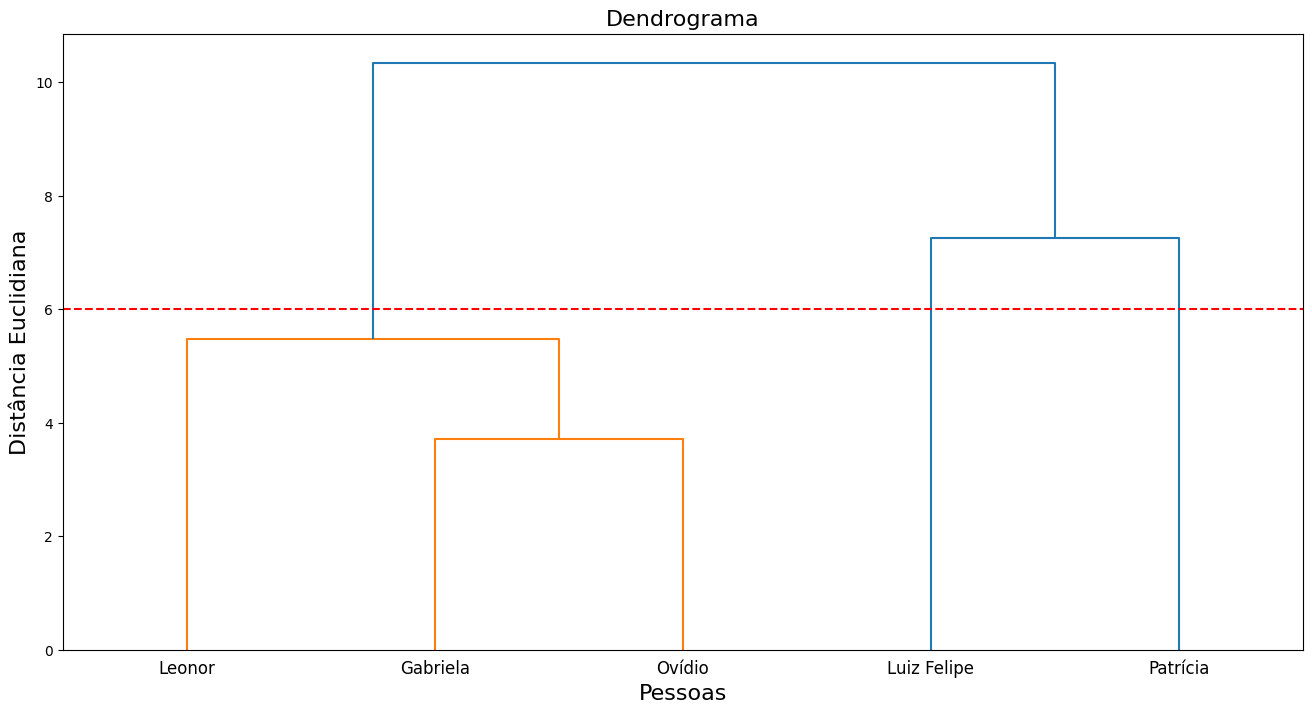

In [12]:
#%% Cluster hierárquico aglomerativo: distância euclidiana + complete linkage

# Gerando o dendrograma
## Distância euclidiana e método de encadeamento complete linkage

plt.figure(figsize=(16,8))
dend_compl = sch.linkage(df_vestibular.drop(columns=['estudante']), method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 6, labels = list(df_vestibular.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()

In [13]:
# Gerando a variável com a indicação do cluster no dataset

cluster_comp = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(df_vestibular.drop(columns=['estudante']))
df_vestibular['cluster_complete'] = indica_cluster_comp
df_vestibular['cluster_complete'] = df_vestibular['cluster_complete'].astype('category')

# Coeficientes do esquema hierárquico de aglomeração (complete)
coef_complete = [y[1] for y in dendrogram_c['dcoord']]
print(coef_complete)

[3.713488925525428, 5.473572873361603, 7.256031973468694, 10.338762014864255]


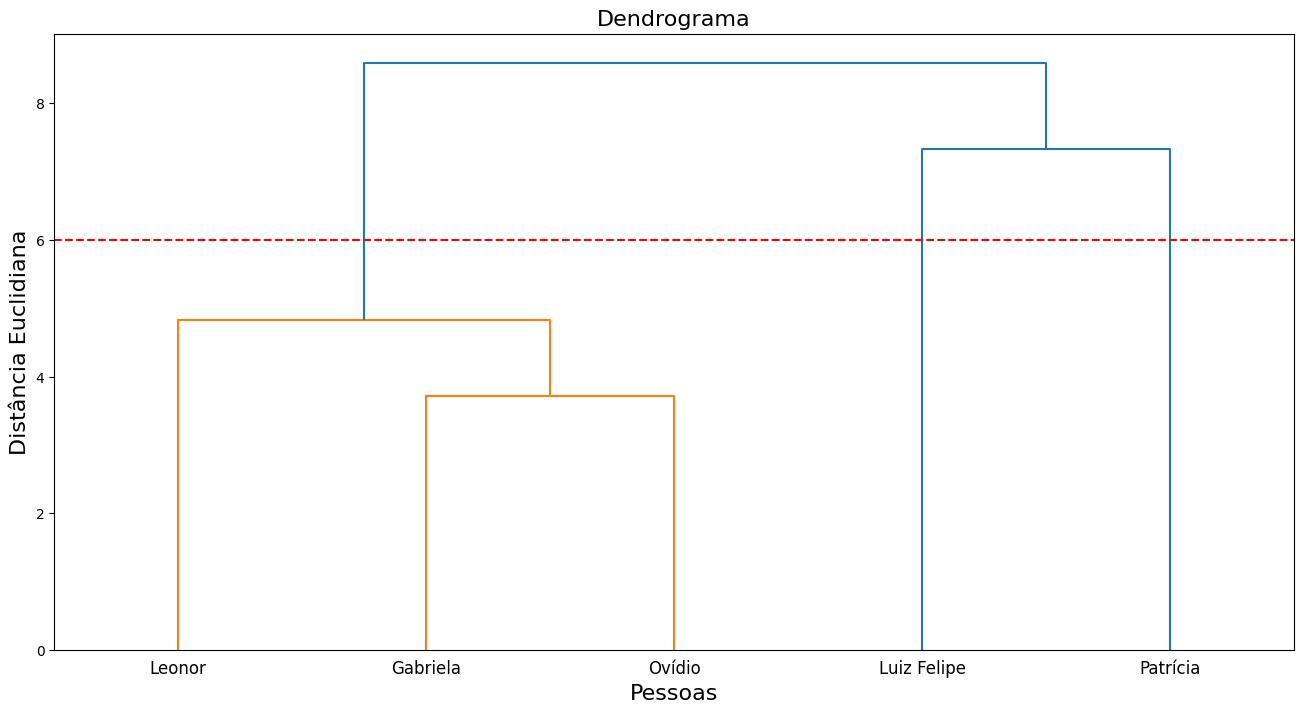

In [14]:
# Cluster hierárquico aglomerativo: distância euclidiana + average linkage

# Gerando o dendrograma
## Distância euclidiana e método de encadeamento average linkage

plt.figure(figsize=(16,8))
dend_avg = sch.linkage(df_vestibular.drop(columns=['estudante']), method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_avg, color_threshold = 6, labels = list(df_vestibular.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()

In [15]:
cluster_avg = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'average')
indica_cluster_avg = cluster_avg.fit_predict(df_vestibular.drop(columns=['estudante']))
df_vestibular['cluster_average'] = indica_cluster_avg
df_vestibular['cluster_average'] = df_vestibular['cluster_average'].astype('category')

# Coeficientes do esquema hierárquico de aglomeração (average)
coef_avg = [y[1] for y in dendrogram_a['dcoord']]
print(coef_avg)

[3.713488925525428, 4.821852382880106, 7.3246160308919945, 8.588995994855122]


In [17]:
#%% Cluster Não Hierárquico K-means

# Considerando que identificamos 3 possíveis clusters na análise hierárquica

kmeans = KMeans(n_clusters=3, init='random', random_state=100).fit(df_vestibular.drop(columns=['estudante']))

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans.labels_
df_vestibular['cluster_kmeans'] = kmeans_clusters
df_vestibular['cluster_kmeans'] = df_vestibular['cluster_kmeans'].astype('category')

#%% Identificando as coordenadas centroides dos clusters finais

cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = df_vestibular.drop(columns=['estudante']).columns
cent_finais.index.name = 'cluster'
cent_finais

,matemática,física,química,cluster_single,cluster_complete,cluster_average,cluster_kmeans
cluster,,,,,,,
0,8.9,1.0,2.7,2.000000e+00,1.000000e+00,1.000000e+00,0.0
1,7.8,8.0,1.5,1.000000e+00,2.000000e+00,2.000000e+00,1.0
2,4.7,1.9,7.7,1.110223e-16,1.110223e-16,1.110223e-16,2.0


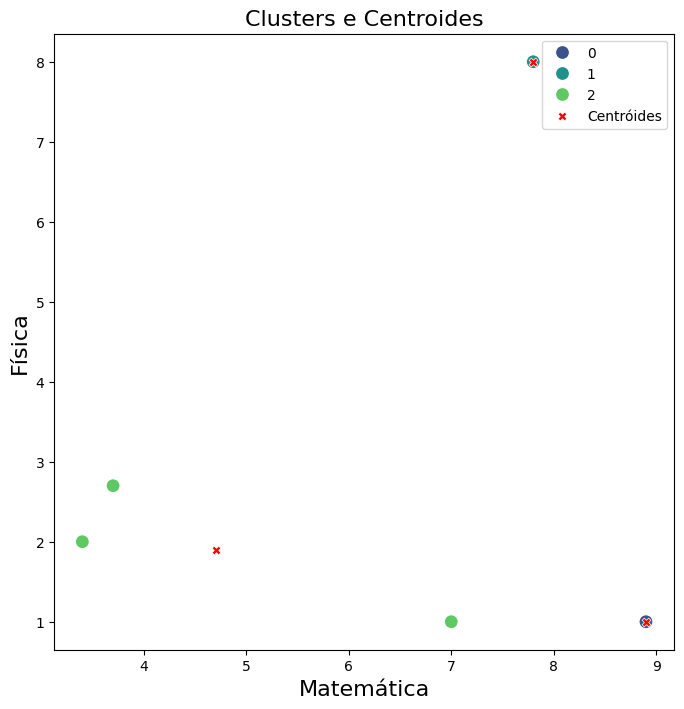

In [18]:
# Plotando as observações e seus centroides dos clusters

plt.figure(figsize=(8,8))
sns.scatterplot(data=df_vestibular.drop(columns=['estudante']), x='matemática', y='física', hue='cluster_kmeans', palette='viridis', s=100)
sns.scatterplot(data=cent_finais, x='matemática', y='física', c = 'red', label = 'Centróides', marker="X", s = 40)
plt.title('Clusters e Centroides', fontsize=16)
plt.xlabel('Matemática', fontsize=16)
plt.ylabel('Física', fontsize=16)
plt.legend()
plt.show()

## Analise de cluster para o dataset País

In [19]:
df_paises = pd.read_csv(f'{DIR_DATA}/dados_paises.csv')
df_paises.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [20]:
df_paises.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [21]:
matriz_corr = pg.rcorr(df_paises.drop(columns=['country']), method = 'pearson', upper = 'pval', 
                       decimals = 4, 
                       pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
matriz_corr

c:\Repositorios\Particular\mba-datascience-analytics-uspesalq\.venv\Lib\site-packages\pingouin\correlation.py:1116: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,-,***,***,,***,***,***,***,***
exports,-0.3181,-,,***,***,,***,***,***
health,-0.2004,-0.1144,-,,*,***,***,**,***
imports,-0.1272,0.7374,0.0957,-,,***,,**,
income,-0.5243,0.5168,0.1296,0.1224,-,*,***,***,***
inflation,0.2883,-0.1073,-0.2554,-0.247,-0.1478,-,***,***,***
life_expec,-0.8867,0.3163,0.2107,0.0544,0.612,-0.2397,-,***,***
total_fer,0.8485,-0.32,-0.1967,-0.159,-0.5018,0.3169,-0.7609,-,***
gdpp,-0.483,0.4187,0.346,0.1155,0.8956,-0.2216,0.6001,-0.4549,-


In [22]:
corr = df_paises.drop(columns=['country']).corr()

# Gráfico de calor (heatmap)
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.2f}',
        colorscale='viridis'))

fig.update_layout(height = 600, width = 600, title = 'Matriz de Correlação')
fig.show()

In [23]:
df_paises_pad = df_paises.drop(columns=['country']).apply(zscore, ddof=1)
df_paises_pad.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [24]:
# Opções para as distâncias ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation

dist_euclidiana = pdist(df_paises_pad, metric='euclidean')
dist_euclidiana

array([4.13092195, 3.88586508, 2.99065182, ..., 3.4306949 , 4.35369694,
       2.16645141])

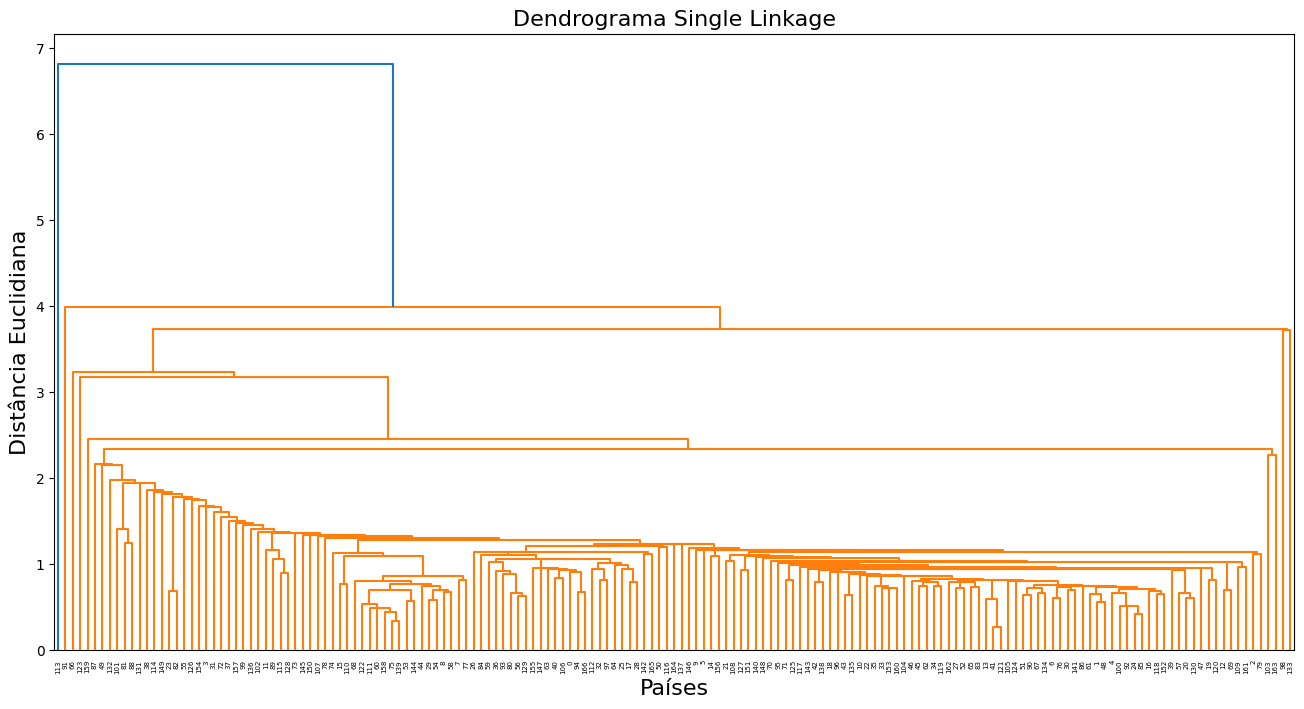

In [25]:
# Cluster hierárquico aglomerativo: distância euclidiana + single linkage
# Opções para o método de encadeamento ("method"):
    ## single
    ## complete
    ## average

# Opções para as distâncias ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation

# Gerando o dendrograma
## Distância euclidiana e método de encadeamento single linkage

plt.figure(figsize=(16,8))
dend_sing = sch.linkage(df_paises_pad, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing)
plt.title('Dendrograma Single Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

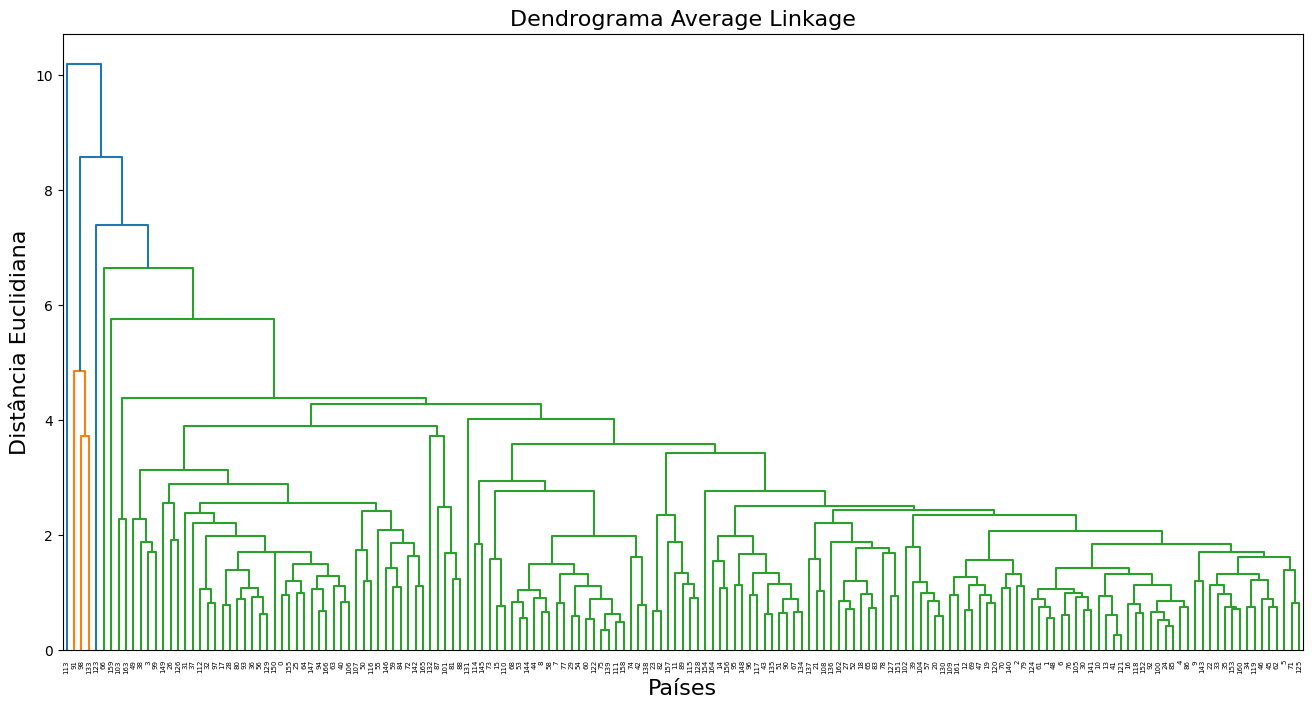

In [26]:
# Cluster hierárquico aglomerativo: distância euclidiana + average linkage
# Gerando o dendrograma
## Distância euclidiana e método de encadeamento average linkage

plt.figure(figsize=(16,8))
dend_avg = sch.linkage(df_paises_pad, method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_avg)
plt.title('Dendrograma Average Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

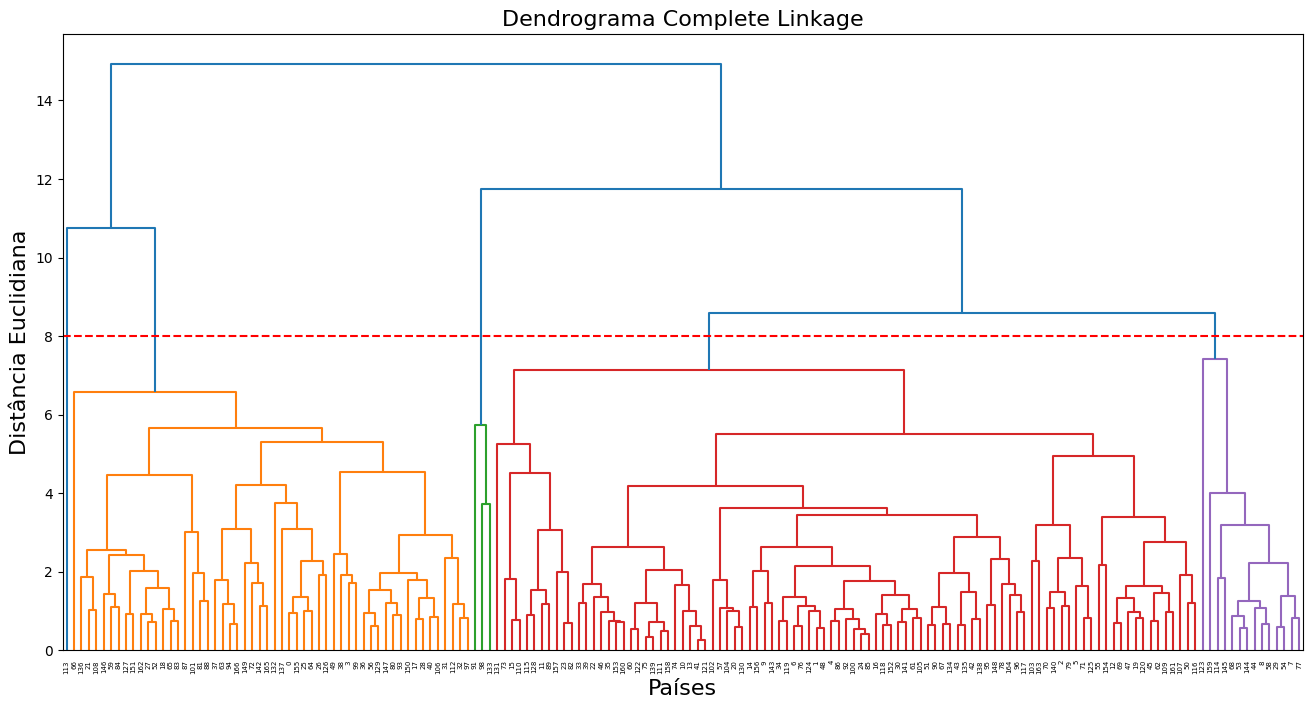

In [27]:
# Cluster hierárquico aglomerativo: distância euclidiana + complete linkage

# Gerando o dendrograma
## Distância euclidiana e método de encadeamento complete linkage

plt.figure(figsize=(16,8))
dend_compl = sch.linkage(df_paises_pad, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 8)
plt.title('Dendrograma Complete Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 8, color = 'red', linestyle = '--')
plt.show()

In [28]:
# Gerando a variável com a indicação do cluster no dataset

cluster_comp = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(df_paises_pad)
df_paises['cluster_complete'] = indica_cluster_comp
df_paises_pad['cluster_complete'] = indica_cluster_comp
df_paises['cluster_complete'] = df_paises['cluster_complete'].astype('category')
df_paises_pad['cluster_complete'] = df_paises_pad['cluster_complete'].astype('category')

In [29]:
# Análise de variância de um fator (ANOVA)

# Interpretação do output:

## cluster_kmeans MS: indica a variabilidade entre grupos
## Within MS: indica a variabilidade dentro dos grupos
## F: estatística de teste (cluster_kmeans MS / Within MS)
## p-unc: p-valor da estatística F
## se p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

# child_mort
pg.anova(dv='child_mort', 
         between='cluster_complete', 
         data=df_paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,100.71482,65.28518
DF,4,162
MS,25.178705,0.402995
F,62.478961,NaN
p-unc,0.0,NaN
np2,0.606716,NaN


In [30]:
# exports
pg.anova(dv='exports', 
         between='cluster_complete', 
         data=df_paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,79.966834,86.033166
DF,4,162
MS,19.991709,0.531069
F,37.644283,NaN
p-unc,0.0,NaN
np2,0.481728,NaN


In [31]:
# imports
pg.anova(dv='imports', 
         between='cluster_complete', 
         data=df_paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,69.028651,96.971349
DF,4,162
MS,17.257163,0.598589
F,28.829756,NaN
p-unc,0.0,NaN
np2,0.415835,NaN


In [32]:
# health
pg.anova(dv='health', 
         between='cluster_complete', 
         data=df_paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,25.065957,140.934043
DF,4,162
MS,6.266489,0.869963
F,7.203166,NaN
p-unc,0.000023,NaN
np2,0.151,NaN


In [33]:
# income
pg.anova(dv='income', 
         between='cluster_complete', 
         data=df_paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,84.56379,81.43621
DF,4,162
MS,21.140947,0.502693
F,42.055414,NaN
p-unc,0.0,NaN
np2,0.50942,NaN


In [34]:
# inflation
pg.anova(dv='inflation', 
         between='cluster_complete', 
         data=df_paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,88.665145,77.334855
DF,4,162
MS,22.166286,0.477376
F,46.433635,NaN
p-unc,0.0,NaN
np2,0.534127,NaN


In [35]:
# life_expec
pg.anova(dv='life_expec', 
         between='cluster_complete', 
         data=df_paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,111.450643,54.549357
DF,4,162
MS,27.862661,0.336724
F,82.746182,NaN
p-unc,0.0,NaN
np2,0.671389,NaN


In [36]:
# total_fer
pg.anova(dv='total_fer', 
         between='cluster_complete', 
         data=df_paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,113.930595,52.069405
DF,4,162
MS,28.482649,0.321416
F,88.616129,NaN
p-unc,0.0,NaN
np2,0.686329,NaN


In [37]:
# gdpp
pg.anova(dv='gdpp', 
         between='cluster_complete', 
         data=df_paises_pad,
         detailed=True).T

## A variável mais discriminante contém a maior estatística F (e significativa)
## O valor da estatística F é sensível ao tamanho da amostra

,0,1
Source,cluster_complete,Within
SS,107.339064,58.660936
DF,4,162
MS,26.834766,0.362105
F,74.107785,NaN
p-unc,0.0,NaN
np2,0.646621,NaN


In [38]:
# Gráfico 3D dos clusters

# Perspectiva 1
fig = px.scatter_3d(df_paises, 
                    x='total_fer', 
                    y='income', 
                    z='life_expec',
                    color='cluster_complete')
fig.show()

# Perspectiva 2
fig = px.scatter_3d(df_paises, 
                    x='gdpp', 
                    y='income', 
                    z='life_expec',
                    color='cluster_complete')
fig.show()


In [39]:
# Identificação das características dos clusters

# Agrupando o banco de dados

analise_paises = df_paises.drop(columns=['country']).groupby(by=['cluster_complete'])

# Estatísticas descritivas por grupo

tab_medias_grupo = analise_paises.mean().T
tab_medias_grupo

C:\Users\guilherme.fernando\AppData\Local\Temp\ipykernel_39620\3328593341.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



cluster_complete,0,1,2,3,4
child_mort,4.500000,18.874737,4.133333,130.00,81.344444
exports,39.392857,42.718726,176.000000,25.30,31.520741
health,10.292143,6.410842,6.793333,5.07,6.660185
imports,33.207143,44.488062,156.666667,17.40,49.111111
income,49721.428571,18582.000000,64033.333333,5150.00,3787.462963
inflation,2.093571,7.124495,2.468000,104.00,8.926389
life_expec,80.892857,74.478947,81.433333,60.50,60.555556
total_fer,1.800000,2.142000,1.380000,5.84,4.697037
gdpp,53742.857143,11941.473684,57566.666667,2330.00,1910.074074


In [40]:
tab_desc_grupo = analise_paises.describe().T
tab_desc_grupo

cluster_complete             0             1              2       3  \
child_mort count     14.000000     95.000000       3.000000     1.0   
           mean       4.500000     18.874737       4.133333   130.0   
           std        1.781529     16.376170       2.309401     NaN   
           min        2.600000      3.200000       2.800000   130.0   
           25%        3.200000      7.700000       2.800000   130.0   
...                        ...           ...            ...     ...   
gdpp       min    40600.000000    482.000000   21100.000000  2330.0   
           25%    44925.000000   3885.000000   33850.000000  2330.0   
           50%    47900.000000   8000.000000   46600.000000  2330.0   
           75%    56525.000000  14050.000000   75800.000000  2330.0   
           max    87800.000000  50300.000000  105000.000000  2330.0   

cluster_complete             4  
child_mort count     54.000000  
           mean      81.344444  
           std       39.074325  
           min       17.400000  
           25%       54.275000  
...                        ...  
gdpp       min      231.000000  
           25%      566.000000  
           50%      983.500000  
           75%     2600.000000  
           max    17100.000000  

[72 rows x 5 columns]